**First we must import the libraries and data that we'll be using.**

In [4]:
!pip install yfinance 
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import warnings
warnings.filterwarnings("ignore")
try:
    import yfinance as yf    # import  Yahoo! Finance
except:
    !pip install yfinance # install Yahoo! Finance
    import yfinance as yf    # import  Yahoo! Finance

from pandas_datareader import data as pdr
yf.pdr_override()
yf

from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr

In [6]:
# inputs
Stocks = ['TSLA', 'RDFN', 'CDK', 'SONY', 'HPQ', 'MSFT', 'TTWO', 'ARW', 'AMD', 'NVDA']
start = datetime.fromisoformat('2018-11-26')
end = datetime.fromisoformat('2021-12-09')

In [7]:
#individual company data
Tesla = DataReader('TSLA', start, end)
SquareEnix = DataReader('RDFN', start, end)
Tencent = DataReader('CDK', start, end)
Sony = DataReader('SONY', start, end)
Nintendo = DataReader('HPQ', start, end)
Microsoft = DataReader('MSFT', start, end)
TakeTwo = DataReader('TTWO', start, end)
EA = DataReader('ARW', start, end)
AMD = DataReader('AMD', start, end)
Nvidia = DataReader('NVDA', start, end)

#10 Selec
df = pd.DataFrame()
data = []
for symbol in Stocks:
    df = pd.merge(df, pd.DataFrame(yf.download(symbol, fields='price', 
                           start=start, end=end)['Adj Close']), 
                           right_index=True, left_index=True, how='outer')
       
    # Appends tickers which have data
    data.append(symbol)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [8]:
df.columns = data
df = df.dropna(axis='columns')
print("The head of the data")
df.head()

The head of the data


,TSLA,RDFN,CDK,SONY,HPQ,MSFT,TTWO,ARW,AMD,NVDA
Date,,,,,,,,,,
2018-11-26,346.000000,15.360000,48.232071,50.167988,20.569359,102.955841,110.440002,74.050003,20.080000,152.732239
2018-11-27,343.920013,15.460000,47.090313,50.512142,20.497217,103.603722,109.559998,73.300003,21.049999,153.410828
2018-11-28,347.869995,16.280001,48.203285,52.026428,21.128460,107.452362,110.629997,75.349998,21.340000,159.737625
2018-11-29,341.170013,17.120001,48.145721,51.013630,20.614450,106.553062,111.910004,76.470001,21.430000,157.072525
2018-11-30,350.480011,16.959999,48.501781,51.937935,20.740694,107.229950,109.669998,76.970001,21.299999,163.131454


In [9]:
print("The tail of the data")
df.tail()


The tail of the data


,TSLA,RDFN,CDK,SONY,HPQ,MSFT,TTWO,ARW,AMD,NVDA
Date,,,,,,,,,,
2021-12-02,1084.599976,39.430000,40.209999,120.160004,37.385193,329.489990,161.380005,122.860001,150.679993,321.260010
2021-12-03,1014.969971,38.320000,40.230000,120.019997,37.295803,323.010010,165.779999,122.160004,144.009995,306.929993
2021-12-06,1009.010010,40.290001,41.000000,121.000000,36.680000,326.190002,164.399994,123.099998,139.059998,300.369995
2021-12-07,1051.750000,41.049999,40.669998,124.760002,37.290001,334.920013,167.289993,125.209999,144.850006,324.269989
2021-12-08,1068.959961,42.549999,40.389999,125.940002,36.709999,334.970001,170.550003,125.910004,145.240005,318.260010


In [10]:
print("More details about the data.")
df.describe()

More details about the data.


,TSLA,RDFN,CDK,SONY,HPQ,MSFT,TTWO,ARW,AMD,NVDA
count,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000
mean,452.506916,37.444275,47.187097,76.235315,21.667477,191.653315,142.892033,86.712706,62.513072,324.259499
std,254.341034,20.347490,5.702423,23.693799,5.654048,64.833813,32.158916,20.309812,32.498688,171.157975
min,72.244003,10.330000,29.338093,41.328121,12.429758,91.023140,84.629997,41.060001,16.650000,126.847855
25%,244.100006,18.450001,43.277031,55.409660,17.601332,134.489624,116.959999,71.150002,31.240000,181.121750
50%,358.489990,32.570000,47.584660,70.192741,19.281544,184.278305,135.669998,79.849998,54.549999,246.918930
75%,662.159973,51.830002,51.534801,99.339996,27.303905,236.147736,170.600006,105.379997,85.309998,508.718842
max,1229.910034,96.589996,60.194778,125.940002,37.385193,343.109985,213.339996,129.600006,161.910004,819.235229


To help us see what we're looking at, let's plot the stock prices of all 10 companies. Notice the changes in Sega are barely noticble.

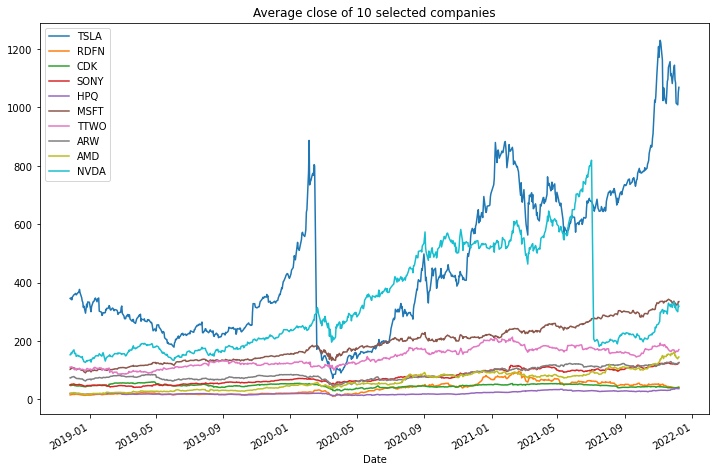

In [12]:
Tesla['Adj Close'].plot(label = 'TSLA', figsize = (12,8))
SquareEnix['Adj Close'].plot(label = 'RDFN')
Tencent['Adj Close'].plot(label = 'CDK')
Sony['Adj Close'].plot(label = 'SONY')
Nintendo['Adj Close'].plot(label = 'HPQ')
Microsoft['Adj Close'].plot(label = 'MSFT')
TakeTwo['Adj Close'].plot(label = 'TTWO')
EA['Adj Close'].plot(label = 'ARW')
AMD['Adj Close'].plot(label = 'AMD')
Nvidia['Adj Close'].plot(label = "NVDA")
plt.title('Average close of 10 selected companies')
plt.legend()

In [13]:
rets = df.pct_change(periods=3)
corr = rets.corr()
d = {'Risk':rets.std(), 'Expected Returns':rets.mean()}
print('Table: Risk v Returns')
tables = pd.DataFrame(data=d)
tables   

Table: Risk v Returns


,Risk,Expected Returns
TSLA,0.089646,0.009959
RDFN,0.080076,0.006991
CDK,0.034957,-0.000022
SONY,0.031410,0.003996
HPQ,0.043891,0.003254
MSFT,0.027213,0.004927
TTWO,0.034827,0.002256
ARW,0.036722,0.002733
AMD,0.054450,0.009068
NVDA,0.067472,0.006445


Text(0, 0.5, 'SD')

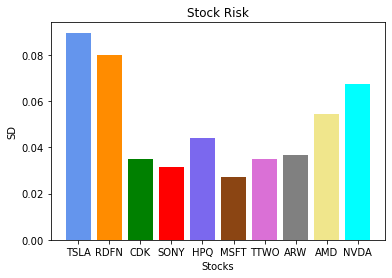

In [14]:
plt.bar(rets.columns, rets.std(), color=['cornflowerblue', 'darkorange', 'green', 'red', 'mediumslateblue', 'saddlebrown', 'orchid', 'grey', 'khaki', 'cyan'])
plt.title("Stock Risk")
plt.xlabel("Stocks")
plt.ylabel("SD")

Text(0, 0.5, 'Returns')

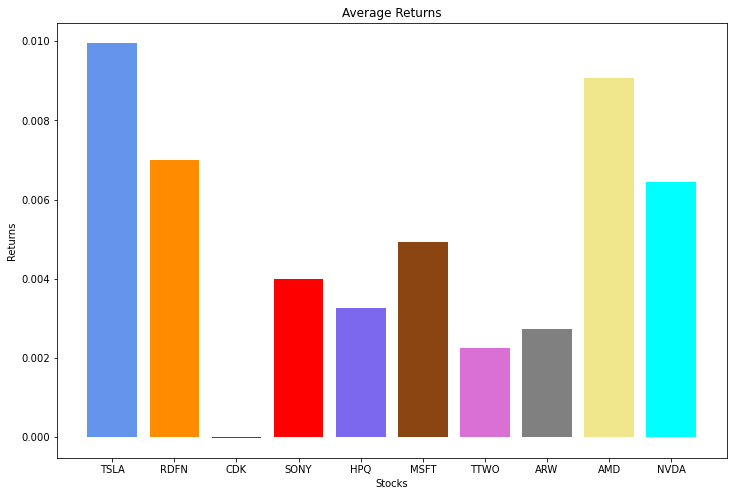

In [15]:
plt.figure(figsize=(12, 8))
plt.bar(rets.columns, rets.mean(), color=['cornflowerblue', 'darkorange', 'green', 'red', 'mediumslateblue', 'saddlebrown', 'orchid', 'grey', 'khaki', 'cyan'])
plt.title("Average Returns")
plt.xlabel("Stocks")
plt.ylabel("Returns")

**CDK Global has very little return, AMD and Nvidia still have the highest but Nvidia contunes to tank.**

**Now let's look at these two peices of information together. Plotting in both a bar and a scatter plot will make it easier to see what has the highest and lowest risks and rewards.**

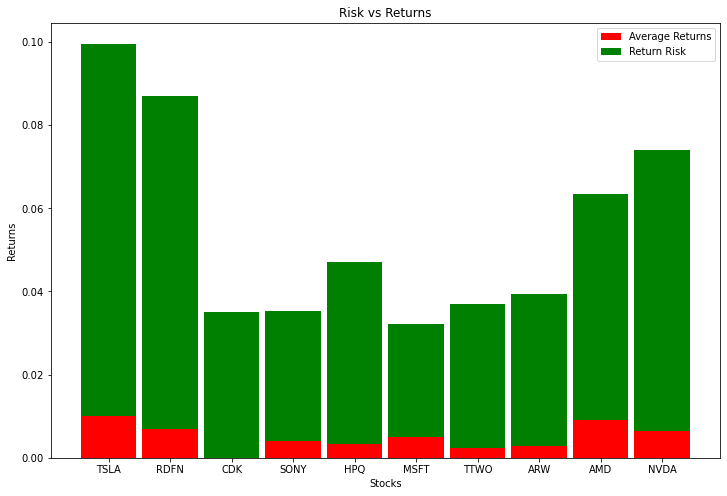

In [16]:
Stocks = ['TSLA', 'RDFN', 'CDK', 'SONY', 'HPQ', 'MSFT', 'TTWO', 'ARW', 'AMD', 'NVDA']
ind = [x for x, _ in enumerate(Stocks)]
plt.figure(figsize=(12, 8))
plt.bar(ind, rets.mean(), width=0.9, label='Average Returns', color='r')
plt.bar(ind, rets.std(), width=0.9, label='Return Risk', color='g', bottom=rets.mean())

plt.xticks(ind, Stocks)
plt.ylabel("Returns")
plt.xlabel("Stocks")
plt.legend(loc="upper right")
plt.title('Risk vs Returns')
plt.show()

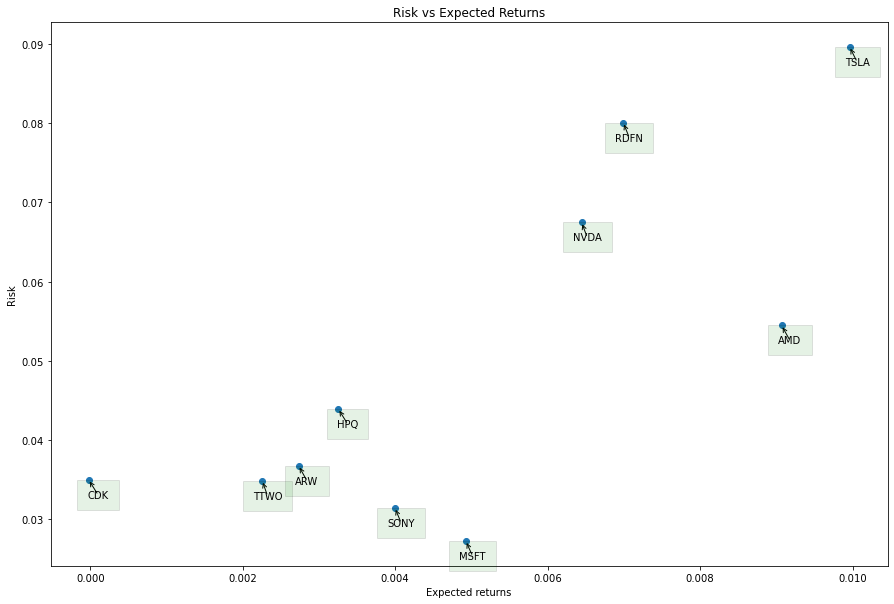

In [17]:
plt.figure(figsize=(15, 10))
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.title('Risk vs Expected Returns')
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'square,pad=1', fc = 'green', alpha = 0.1),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    

**Investment for the week of 12/10**
This week I sold 200 shares of SONY, 200 shares of MSFT, and 250 shares of NVDA. I bought 675 shares of AMD, 600 shares of SONY, and 100 shares of MSFT

I had planned on dumping all of my stocks on Friday 12/10 but the game ended earlier than expected. Because of this my rank dropped from 5 down to rank 22. Overall I learned a lot about investing and I thought this project was pretty insightful in general.